In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('oasis_cross-sectional.csv')
df2 = pd.read_csv('oasis_longitudinal.csv')

In [3]:
df.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [4]:
df2.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
ID       436 non-null object
M/F      436 non-null object
Hand     436 non-null object
Age      436 non-null int64
Educ     235 non-null float64
SES      216 non-null float64
MMSE     235 non-null float64
CDR      235 non-null float64
eTIV     436 non-null int64
nWBV     436 non-null float64
ASF      436 non-null float64
Delay    20 non-null float64
dtypes: float64(7), int64(2), object(3)
memory usage: 41.0+ KB


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
Subject ID    373 non-null object
MRI ID        373 non-null object
Group         373 non-null object
Visit         373 non-null int64
MR Delay      373 non-null int64
M/F           373 non-null object
Hand          373 non-null object
Age           373 non-null int64
EDUC          373 non-null int64
SES           354 non-null float64
MMSE          371 non-null float64
CDR           373 non-null float64
eTIV          373 non-null int64
nWBV          373 non-null float64
ASF           373 non-null float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


# Dataset features and target

First and foremost, our target is the CDR column. CDR or Clinical Dementia Rating is a rating of the severity of dementia in a patient and is based on a clinical algorithm. More info on CDR can be found here https://en.wikipedia.org/wiki/Clinical_Dementia_Rating

CDR Scores: Symptom

* 0: none
* 0.5: very mild
* 1: mild
* 2: moderate
* 3: severe

For our features, Subject ID, MRI ID, Group, and Hand are not telling of a patient's likelihood to have Alzheimers. Hand is not relevant because, as mentioned in the data dictionary, all patients are right-handed in this dataset. We must transform M/F to a binary classification.

In [7]:
gender = pd.get_dummies(df2['M/F'],drop_first=True)
df2 = pd.concat([df2,gender], axis=1)

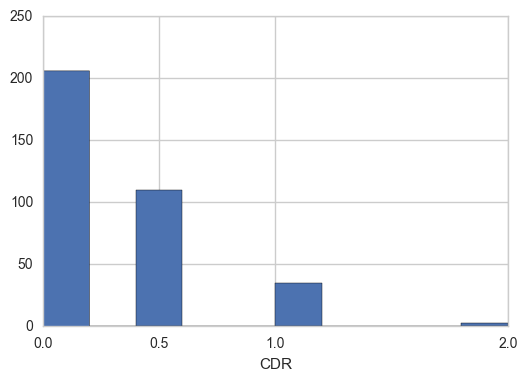

In [47]:
plt.hist(x='CDR', data=df2)
plt.xticks([0,0.5,1,2])
plt.xlabel('CDR')

Our data is skewed towards those who do not have any symptoms or who possess very mild symptoms. For this analysis, we will focus on characteristics of those in the healthy group vs. those in the demented group

# Missing Data

Let's see which columns have missing data

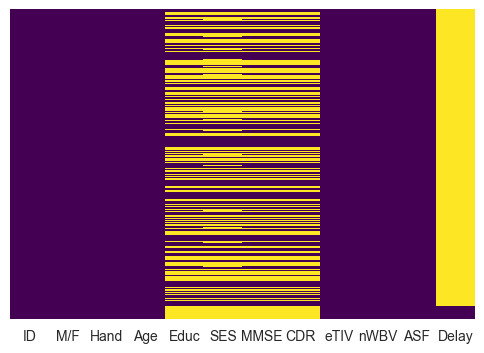

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

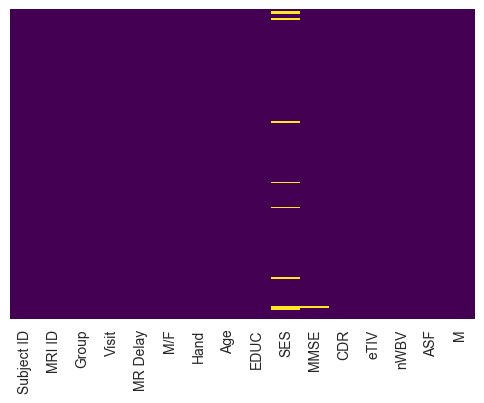

In [10]:
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Longitudinal data is more complete - we can always join our results on the MRI ID column to get the cross sectional features

# Examining Features

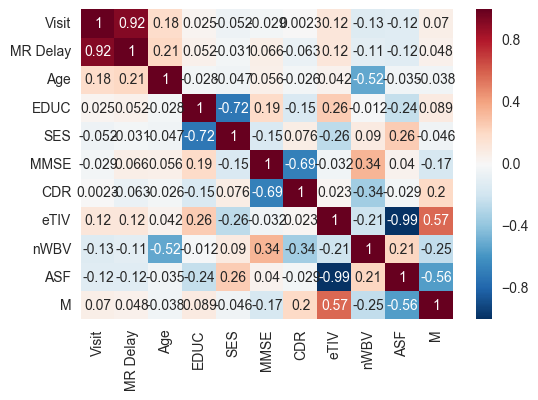

In [11]:
sns.heatmap(df2.corr(), annot=True)

For CDR, we can see that there exists a negative correlation with the Mini Mental State Examination (MMSE). MMSE is a 30 question examination given to patients to determine the presence/severity of cognitive impairment.

*"Low to very low scores correlate closely with the presence of dementia, although other mental disorders can also lead to abnormal findings on MMSE testing"*

More info on MMSE can be found here https://en.wikipedia.org/wiki/Mini%E2%80%93Mental_State_Examination

The almost perfect negative correlation between Atlas Scaling Factor (ASF) and estimated Total Intracranial Volume (eTIV) is expected. Further reading on relationship between ASF and TIV can be found here https://surfer.nmr.mgh.harvard.edu/fswiki/eTIV?action=AttachFile&do=view&target=buckner2004.pdf

# Gender and Alzheimers

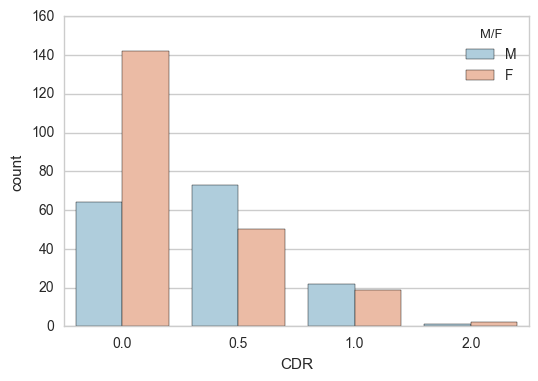

In [12]:
sns.countplot(x='CDR',hue='M/F',data=df2,palette='RdBu_r')

In [13]:
df2['M/F'].value_counts()

F    213
M    160
Name: M/F, dtype: int64

In [14]:
df2[(df2['M/F'] == 'M') & (df['CDR'] > 0)].count()

Subject ID    38
MRI ID        38
Group         38
Visit         38
MR Delay      38
M/F           38
Hand          38
Age           38
EDUC          38
SES           37
MMSE          38
CDR           38
eTIV          38
nWBV          38
ASF           38
M             38
dtype: int64

In [15]:
df2[(df2['M/F'] == 'F') & (df['CDR'] > 0)].count()

Subject ID    49
MRI ID        49
Group         49
Visit         49
MR Delay      49
M/F           49
Hand          49
Age           49
EDUC          49
SES           49
MMSE          49
CDR           49
eTIV          49
nWBV          49
ASF           49
M             49
dtype: int64

* There are more women in this dataset then men
* 49 / 213 or 23% of the women in the dataset have some form of dementia (CDR > 0)
* 38 / 160 or 24% of the men in the dataset have some form of dementia (CDR > 0)

# Education History and Alzheimers

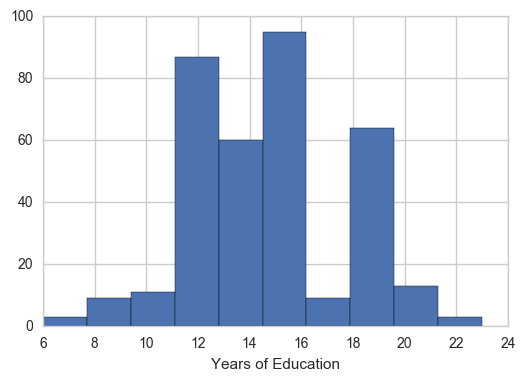

In [46]:
plt.hist(x='EDUC',data=df2)
plt.xlabel('Years of Education')

Four different levels of education stand out from the distribution:

* High School
* Some College
* Bachelor's Degree
* Graduate Degrees

Lets scale the EDUC variable down to these four categories

* We'll compare model performance against scaled version and continuous version

In [17]:
Mac_and_Devin = df2[df2['EDUC'] <= 12]['EDUC']
associates = df2[(df2['EDUC'] > 12) & (df2['EDUC'] < 16)]['EDUC']
bachelors = df2[(df2['EDUC'] >= 16) & (df2['EDUC'] < 18)]['EDUC']
grads = df2[df2['EDUC'] >=18]['EDUC']
educ_df = pd.concat([Mac_and_Devin, associates, bachelors, grads], axis=1)
educ_df.columns = ['High School', 'Some College', 'Bachelors', 'Graduate Degrees']

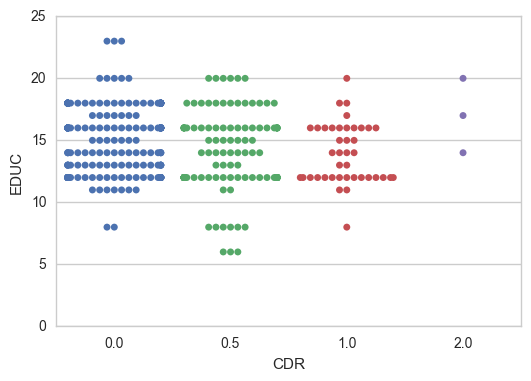

In [18]:
sns.swarmplot(x='CDR',y='EDUC',data=df2)

There appears to be equal presence of CDR in differing levels of education. The horizontal lines at 12 EDUC and 16 EDUC appear to reflect CDR in three different varieties (none, very mild symptoms, mild symptoms). Something to note is the apparent lack of CDR >= 1 in those with graduate degrees (only 4 / 373 or 1%)

# Model selection and training

Since we have some non-linear variables, I'll start with Random Forest Classifier (RFC) and Logistical Regression (Log R) then finish off with a neural network.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [20]:
df2.dropna(inplace=True)
CDR_map = {
    0: 'none',
    0.5: 'Very Mild',
    1: 'Mild',
    2: 'Moderate'
}

X_train, X_test, y_train, y_test = train_test_split(df2.drop(['CDR', 'Subject ID', 'MRI ID', 'Group', 'Hand', 'M/F'],axis=1), 
                                                    df2['CDR'].map(CDR_map), test_size=0.20, 
                                                    random_state=37)

In [21]:
rfc = RandomForestClassifier(n_estimators=100)

In [22]:
LR = LogisticRegression()

In [23]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [24]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [25]:
rfc_pred = rfc.predict(X_test)

In [26]:
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
lr_pred = LR.predict(X_test)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [29]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [30]:
mlp.fit(scaled_X_train, y_train)

/Users/travisjefferies/anaconda/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [31]:
mlp_pred = mlp.predict(scaled_X_test)

# Initial Model Evaluation: RFC

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(confusion_matrix(y_test,rfc_pred))

[[ 5  0  3  1]
 [ 0  0  1  0]
 [ 1  0 12  5]
 [ 0  0 10 33]]


In [34]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

       Mild       0.83      0.56      0.67         9
   Moderate       0.00      0.00      0.00         1
  Very Mild       0.46      0.67      0.55        18
       none       0.85      0.77      0.80        43

avg / total       0.74      0.70      0.71        71



/Users/travisjefferies/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Initial Model Evaluation: LR

In [35]:
print(confusion_matrix(y_test,lr_pred))

[[ 4  0  2  3]
 [ 1  0  0  0]
 [ 0  0 12  6]
 [ 0  0  8 35]]


In [36]:
print(classification_report(y_test,lr_pred))

             precision    recall  f1-score   support

       Mild       0.80      0.44      0.57         9
   Moderate       0.00      0.00      0.00         1
  Very Mild       0.55      0.67      0.60        18
       none       0.80      0.81      0.80        43

avg / total       0.72      0.72      0.71        71



/Users/travisjefferies/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Initial Model Evaluation: MLP

In [37]:
print(confusion_matrix(y_test,mlp_pred))

[[ 4  0  3  2]
 [ 0  0  1  0]
 [ 2  0 12  4]
 [ 0  0 11 32]]


In [38]:
print(classification_report(y_test,mlp_pred))

             precision    recall  f1-score   support

       Mild       0.67      0.44      0.53         9
   Moderate       0.00      0.00      0.00         1
  Very Mild       0.44      0.67      0.53        18
       none       0.84      0.74      0.79        43

avg / total       0.71      0.68      0.68        71



/Users/travisjefferies/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Initial Model Evaluation

* All three classifiers performed similarly - RFC and LR better so then the neural net
* All three classifiers had a hard time predicting the 'Very Mild' symptom class
* None of the classifiers were capable of correctly classifying the Moderate case

For the neural network, I will try to use the tanh activation function instead of RELU

In [39]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), activation='tanh')

In [40]:
mlp.fit(scaled_X_train, y_train)

/Users/travisjefferies/anaconda/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [41]:
mlp_pred2 = mlp.predict(scaled_X_test)

# Round 2 Model Evaluation: MLP

In [42]:
print(confusion_matrix(y_test,mlp_pred2))

[[ 5  0  2  2]
 [ 1  0  0  0]
 [ 1  0 14  3]
 [ 0  0 10 33]]


In [43]:
print(classification_report(y_test,mlp_pred2))

             precision    recall  f1-score   support

       Mild       0.71      0.56      0.63         9
   Moderate       0.00      0.00      0.00         1
  Very Mild       0.54      0.78      0.64        18
       none       0.87      0.77      0.81        43

avg / total       0.75      0.73      0.73        71



/Users/travisjefferies/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Conclusion

In [44]:
scores = {
    'Random Forest Classifier': classification_report(y_test,rfc_pred),
    'Logistic Regression': classification_report(y_test,lr_pred),
    'Neural Network (RELU)': classification_report(y_test,mlp_pred),
    'Neural Network (tanh)': classification_report(y_test,mlp_pred2)
}

for k,v in scores.items():
    print(k,v)

Logistic Regression              precision    recall  f1-score   support

       Mild       0.80      0.44      0.57         9
   Moderate       0.00      0.00      0.00         1
  Very Mild       0.55      0.67      0.60        18
       none       0.80      0.81      0.80        43

avg / total       0.72      0.72      0.71        71

Neural Network (RELU)              precision    recall  f1-score   support

       Mild       0.67      0.44      0.53         9
   Moderate       0.00      0.00      0.00         1
  Very Mild       0.44      0.67      0.53        18
       none       0.84      0.74      0.79        43

avg / total       0.71      0.68      0.68        71

Random Forest Classifier              precision    recall  f1-score   support

       Mild       0.83      0.56      0.67         9
   Moderate       0.00      0.00      0.00         1
  Very Mild       0.46      0.67      0.55        18
       none       0.85      0.77      0.80        43

avg / total       0.74  

/Users/travisjefferies/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Performance-wise, not bad - but none of the classifiers were able to pull out the moderate cases of dementia. A dataset possessing a higher number of moderate CDR scores is recommended to alleviate this shortcoming. tanh performed much better than RELU for the neural network. Overall, the neural network performed the best. Adding in a support vector machine for comparison is a suggested next step.